<h1>question 2</h1>

In [74]:
import csv

data = []
with open('insurance.csv' , 'r') as file:
    reader = csv.reader(file , delimiter=',')

    # extracting field names through first row
    fields = next(reader)

    for row in reader:
        data.append(list(map(float, row)))

input = []
label = []

for i in data:
    input.append( i[:3])  
    label.append(i[3])  

In [75]:
def calculate_loss_and_Derivative_mse(weight , y_true , input):
    y_pred = np.dot(input , weight)
    residuals_b = np.reshape(y_pred - y_true , -1)
    gradient = np.array(np.transpose(input)) * residuals_b
    gradients = (2/len(y_true)) * np.sum(gradient , axis=1)
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / len(y_true)
    return loss , gradients

def calculate_loss_and_Derivative_mae(weight , y_true , input):
    y_pred = np.dot(input , weight)
    gradient = np.array(np.transpose(input))
    gradients = (2/len(y_true)) * np.sum(gradient , axis=1)
    squared_error = np.abs(y_pred - y_true)
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / len(y_true)
    return loss , gradients

def optimize(alpha , epoch_size , inputs , labels , optimizer):
    w = np.random.rand(np.shape(inputs)[1])
    error = 99
    counter = 0
    errors = []
    max_error = 0.01
    max_counter = 100

    while error > max_error and counter < max_counter:
        counter += 1
        for i in range(0 , len(labels) ,epoch_size):
            selected_input_data = np.array(input[i:i+epoch_size])
            selected_label_data = np.array(labels[i:i+epoch_size])
            error , loss_Derivative = optimizer(w , selected_label_data , selected_input_data)
            w = w - alpha * loss_Derivative
            errors.append(error)

    return w , errors
    

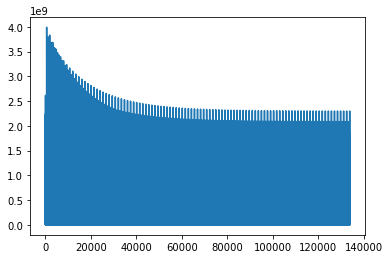

In [78]:
#SGD width mse
alpha = 0.00000001
w , errors = optimize(alpha , 1 , input , label , calculate_loss_and_Derivative_mse) 
plt.plot(range(len(errors)), errors)

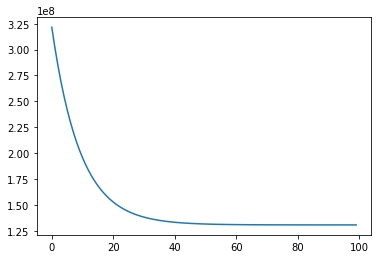

In [81]:
#GD and mse
alpha = 0.00001
w , errors = optimize(alpha , len(label) , input , label , calculate_loss_and_Derivative_mse) 
plt.plot(range(len(errors)), errors)


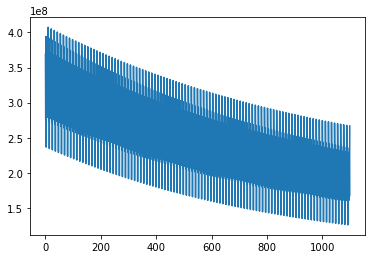

In [82]:
#mini-batch GD and mse
alpha = 0.0000001
w , errors = optimize(alpha , 128 , input , label , calculate_loss_and_Derivative_mse) 
plt.plot(range(len(errors)), errors)


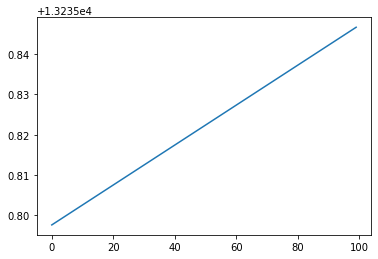

In [95]:
#GD and mae
alpha = 0.0000001
w , errors = optimize(alpha , len(label) , input , label , calculate_loss_and_Derivative_mae) 
plt.plot(range(len(errors)), errors)

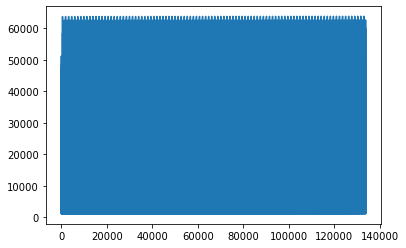

In [100]:
#SGD width mae
alpha = 0.0000001
w , errors = optimize(alpha , 1 , input , label , calculate_loss_and_Derivative_mae) 
plt.plot(range(len(errors)), errors)

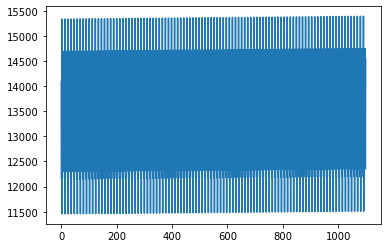

In [105]:
#mini-batch GD and mae
alpha = 0.00001
w , errors = optimize(alpha , 128 , input , label , calculate_loss_and_Derivative_mae) 
plt.plot(range(len(errors)), errors)

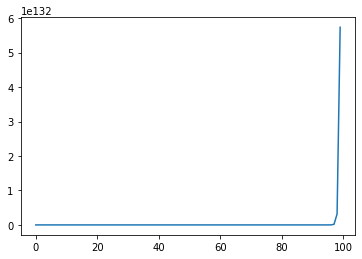

In [106]:
#GD and mse with big alpha
alpha = 0.001
w , errors = optimize(alpha , len(label) , input , label , calculate_loss_and_Derivative_mse) 
plt.plot(range(len(errors)), errors)

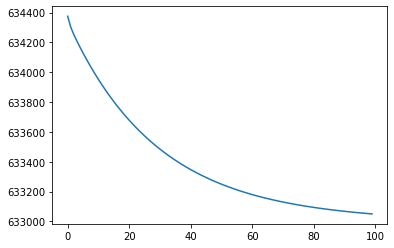

In [118]:
#GD with Mse after normalization

Age = np.array(data)[:,0]
Bmi = np.array(data)[:,1]
Children = np.array(data)[:,2]
Cost = np.array(data)[:,3]

meanAge = np.mean(Age)
meanBmi = np.mean(Bmi)
meanChildren = np.mean(Children)
meanCost = np.mean(Cost)

varAge = np.var(Age)
varBmi = np.var(Bmi)
varChildren = np.var(Children)
varCost = np.var(Cost)

normalize_data = data

for i in range(len(data)-1):
    selectedData = data[i]
    selectedData[0] = ( selectedData[0] - meanAge) / varAge
    selectedData[1] = ( selectedData[1] - meanBmi) / varBmi
    selectedData[2] = ( selectedData[2] - meanChildren) / varChildren
    selectedData[3] = ( selectedData[3] - meanCost) / varCost
    normalize_data[i] = selectedData

normalize_input = []
normalize_label = []

for i in normalize_data:
    normalize_input.append( i[:3])  
    normalize_label.append(i[3])  

alpha = 0.0001
w , errors = optimize(alpha , len(normalize_label) , normalize_input , normalize_label , calculate_loss_and_Derivative_mse) 
plt.plot(range(len(errors)), errors)


<h1>question 3</h1>

In [135]:
incomeData_test = []
incomeData_train = []
incomeData_validation = []
with open('./data/data3/data3_test.csv' , 'r') as file:
    reader = csv.reader(file , delimiter=',')
    for row in reader:
        incomeData_test.append(list(map(float, row)))
        
with open('./data/data3/data3_train.csv' , 'r') as file:
    reader = csv.reader(file , delimiter=',')
    for row in reader:
        incomeData_train.append(list(map(float, row)))
with open('./data/data3/data3_validation.csv' , 'r') as file:
    reader = csv.reader(file , delimiter=',')
    for row in reader:
        incomeData_validation.append(list(map(float, row)))

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

#year
x_test = np.array(incomeData_test)[:,0]
x_train = np.array(incomeData_train)[:,0]
x_validation = np.array(incomeData_validation)[:,0]

#income
y_test = np.array(incomeData_test)[:,1]
y_train = np.array(incomeData_train)[:,1]
y_validation = np.array(incomeData_validation)[:,1]

x_test_normalized = NormalizeData(x_test[:, np.newaxis])
x_train_normalized = NormalizeData(x_train[:, np.newaxis])
x_validation_normalized = NormalizeData(x_validation[:, np.newaxis])

y_test_normalized = y_test / 1000
y_train_normalized = y_train / 1000
y_validation_normalized = y_validation / 1000



[7.22435295]


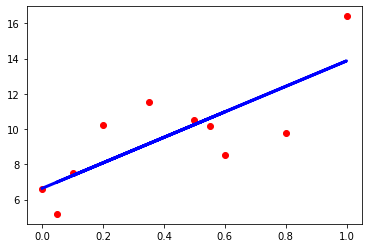

In [137]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_normalized, y_train_normalized)
income_pred = model.predict(x_train_normalized)
plt.plot(x_train_normalized, income_pred, color="blue", linewidth=3)
plt.scatter(x_train_normalized,y_train_normalized ,c='red')
print(model.coef_)


In [138]:
def calculate_mse_error(X , Y , model):
    pred = model.predict(X)
    error = np.sum((pred - Y) ** 2)
    return error

In [139]:

test_error = calculate_mse_error(x_test_normalized , y_test_normalized , model)
validation_error = calculate_mse_error(x_train_normalized , y_train_normalized , model)
train_error = calculate_mse_error(x_validation_normalized , y_validation_normalized , model)

print(test_error , validation_error , train_error)

58.51601941458392 33.260992006334355 31.85156628326856


[4.52860607 2.88452126]
[  44.52365844 -103.8444236    70.63736024]
[  23.25689439    4.6808853  -108.14246308   91.23947006]
[  -17.75167568   361.17612924 -1151.82391933  1319.74867421
  -501.1758471 ]
[  -33.62608451   589.33219619 -2273.56314829  3734.63418678
 -2845.79093713   839.06256255]
[   -79.64336767   1565.72098066  -9467.92449941  28191.6007634
 -44644.6551597   35627.72584812 -11182.95466239]
[-1.07271954e+02  2.34604064e+03 -1.72119810e+04  6.49188435e+04
 -1.37812605e+05  1.65021433e+05 -1.03685612e+05  2.65409859e+04]
[-1.52495522e+02  4.06838280e+03 -4.13867526e+04  2.32220563e+05
 -7.76789874e+05  1.57182488e+06 -1.87489096e+06  1.20648159e+06
 -3.21365525e+05]
[-1.42195692e+02  3.59879301e+03 -3.34928575e+04  1.66207064e+05
 -4.64605516e+05  6.83815612e+05 -3.26990262e+05 -4.09276487e+05
  6.03835722e+05 -2.22940059e+05]


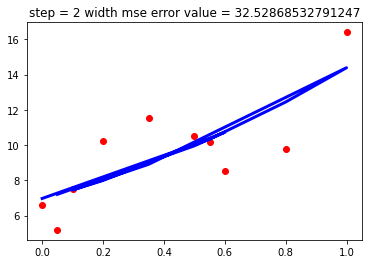

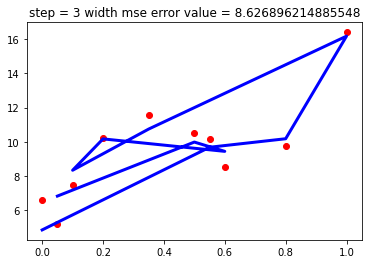

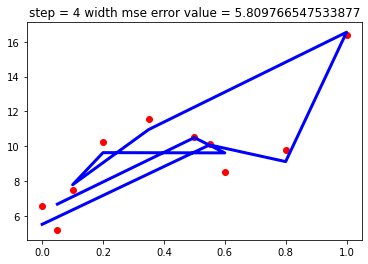

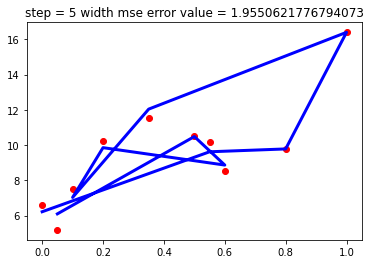

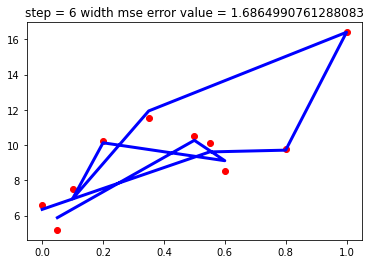

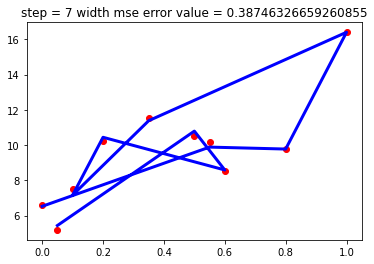

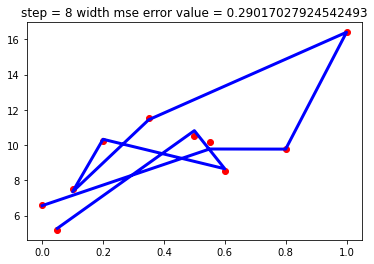

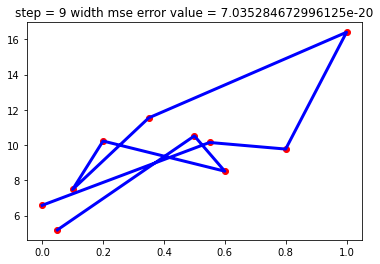

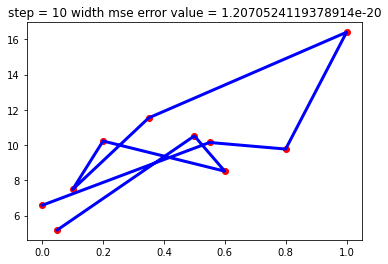

In [204]:
for i in range(2,11):
    newdata = np.copy(x_train_normalized)
    for j in range(2,i+1):
        newdata = np.insert(newdata , [np.shape(newdata)[1]], x_train_normalized ** j, axis=1)

    model = LinearRegression()
    model.fit(newdata, y_train_normalized)
    income_pred = model.predict(newdata)
    plt.figure()
    plt.plot(x_train_normalized, income_pred, color="blue", linewidth=3)
    plt.scatter(x_train_normalized, y_train_normalized , color="red")
    mseValue = np.sum((income_pred - y_train_normalized) ** 2)
    plt.title(f"step = {i} width mse error value = {mseValue}")
    print(model.coef_)


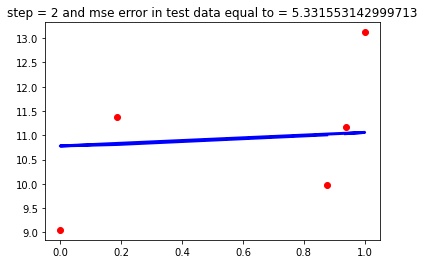

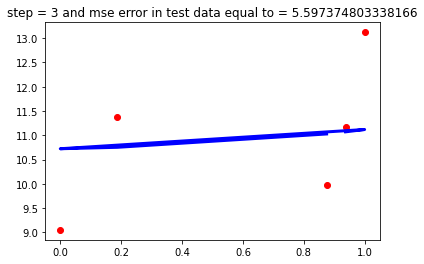

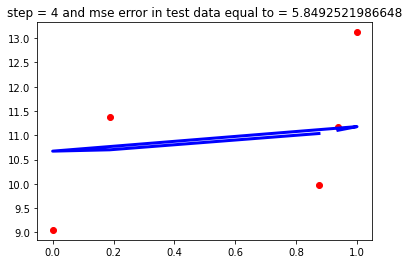

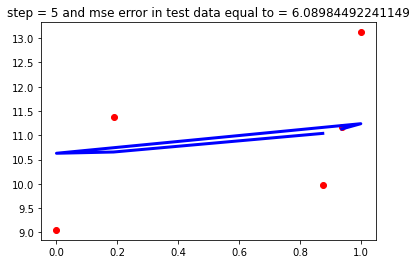

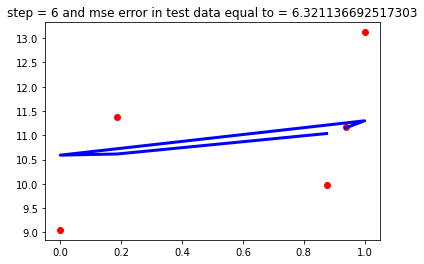

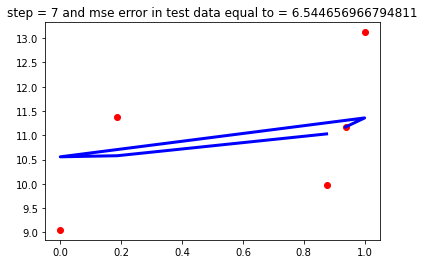

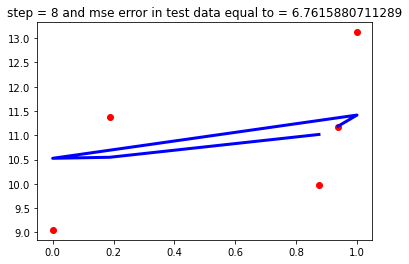

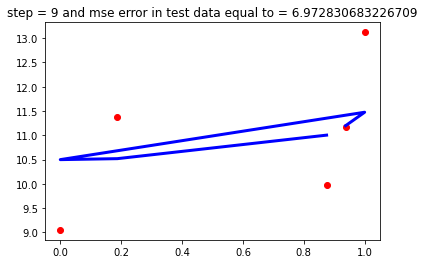

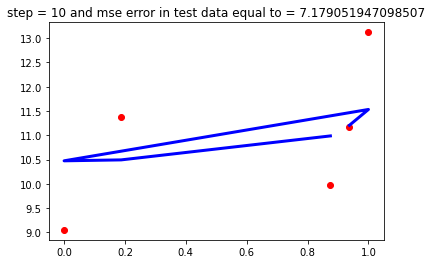

In [205]:
from sklearn.linear_model import Ridge

for i in range(2,11):
    newdata = np.copy(x_validation_normalized)
    for j in range(2,i+1):
        newdata = np.insert(newdata , [np.shape(newdata)[1]], x_validation_normalized ** j, axis=1)

    model = Ridge()
    model.alpha = 10
    model.fit(newdata, y_validation_normalized)
    income_pred = model.predict(newdata)
    plt.figure()
    plt.plot(x_validation_normalized, income_pred, color="blue", linewidth=3)
    plt.scatter(x_validation_normalized, y_validation_normalized , color="red")
    mseValue = np.sum((income_pred - y_test_normalized) ** 2)
    plt.title(f"step = {i} and mse error in test data equal to = {mseValue}")

<h1>question 4</h1>

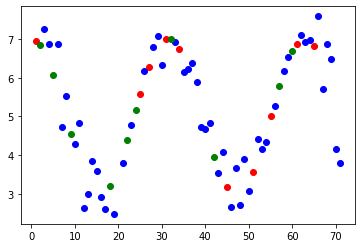

In [206]:
Data_test = []
Data_train = []
Data_validation = []
with open('./data/data4/data4_test.csv' , 'r') as file:
    reader = csv.reader(file , delimiter=',')
    for row in reader:
        Data_test.append(list(map(float, row)))
        
with open('./data/data4/data4_train.csv' , 'r') as file:
    reader = csv.reader(file , delimiter=',')
    for row in reader:
        Data_train.append(list(map(float, row)))
with open('./data/data4/data4_validation.csv' , 'r') as file:
    reader = csv.reader(file , delimiter=',')
    for row in reader:
        Data_validation.append(list(map(float, row)))

x_test = np.array(Data_test)[:,0]
y_test = np.array(Data_test)[:,1]

x_train = np.array(Data_train)[:,0]
y_train = np.array(Data_train)[:,1]

x_validation = np.array(Data_validation)[:,0]
y_validation = np.array(Data_validation)[:,1]

plt.scatter(x_test , y_test , c='red')
plt.scatter(x_train , y_train , c='blue')
plt.scatter(x_validation , y_validation , c='green')

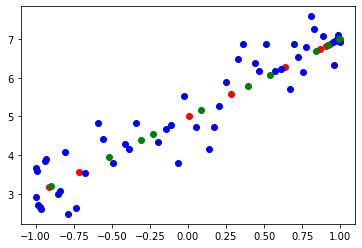

In [207]:
j = 5

x_test_new = np.reshape(np.cos(x_test/j) , (-1,1))
x_train_new = np.reshape(np.cos(x_train/j) , (-1 , 1))
x_validation_new =  np.reshape(np.cos(x_validation/j) , (-1 , 1))

y_test_new =  np.reshape(np.cos(y_test / j) , (-1,1))
y_train_new =  np.reshape(np.cos(y_train / j) , (-1,1))
y_validation_new =  np.reshape(np.cos(y_validation / j) , (-1,1))

plt.scatter(x_test_new , y_test , c='red')
plt.scatter(x_train_new , y_train , c='blue')
plt.scatter(x_validation_new , y_validation , c='green')

[[2.05582086]]


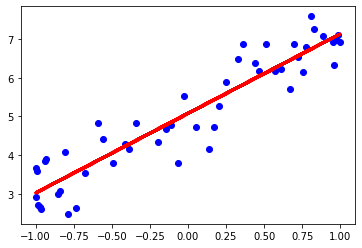

In [208]:
model = LinearRegression()
input = np.reshape(x_train_new , (-1,1))
model.fit(input, y_train[:, np.newaxis])

print(model.coef_)

pred = model.predict(input)
plt.plot(input, pred, color="red", linewidth=3)
plt.scatter(input , y_train , c='blue')

In [209]:
test_error = calculate_mse_error(x_test_new , y_test , model)
validation_error = calculate_mse_error(x_train_new , y_train , model)
train_error = calculate_mse_error(x_validation_new , y_validation , model)

print(test_error , validation_error , train_error)

382.61191880341266 10883.960344499283 320.39064978701145


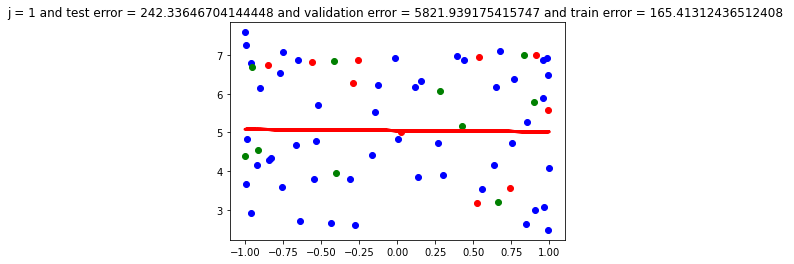

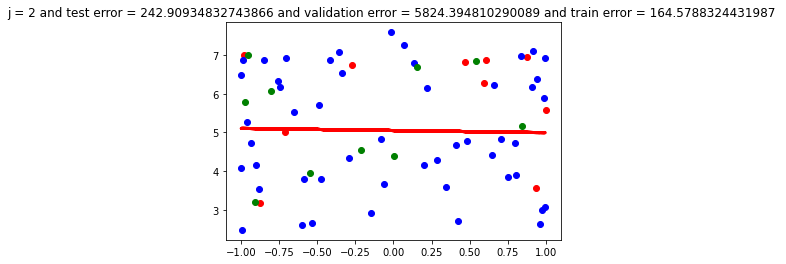

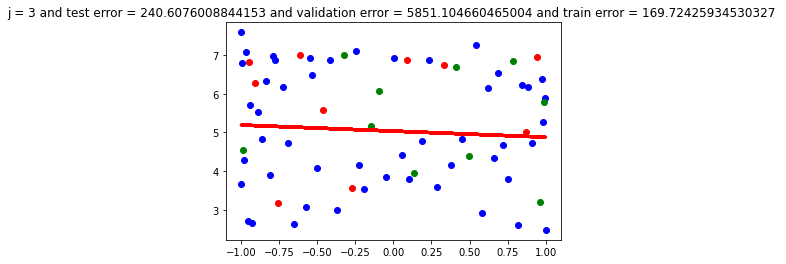

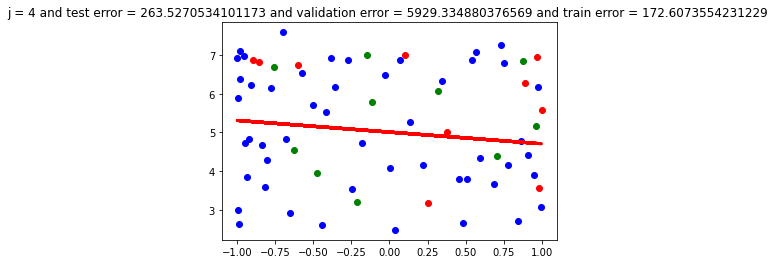

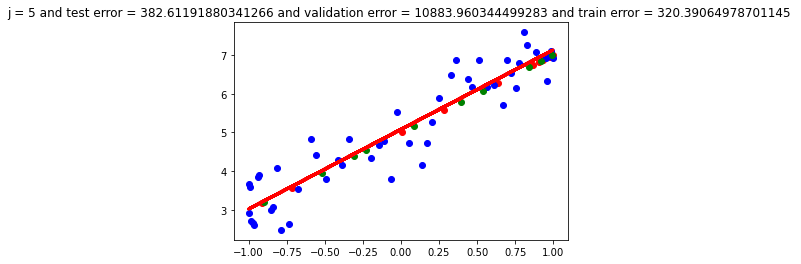

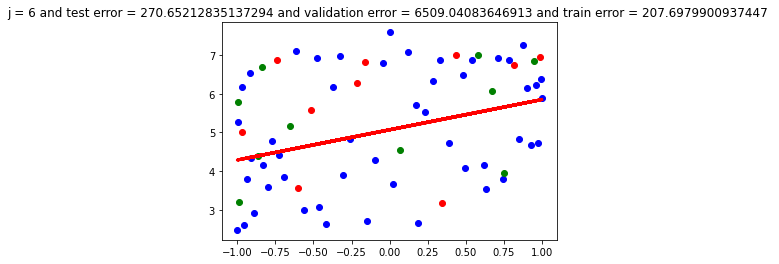

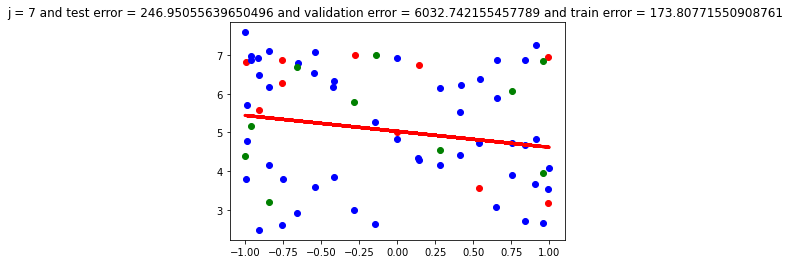

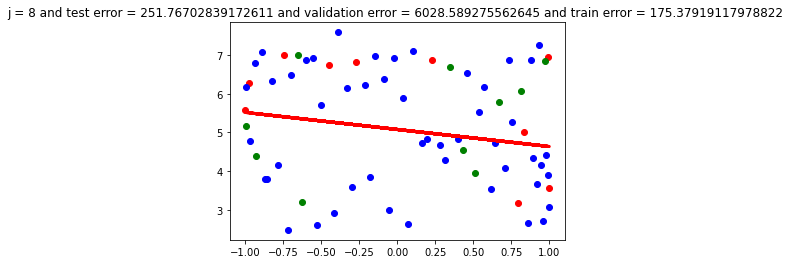

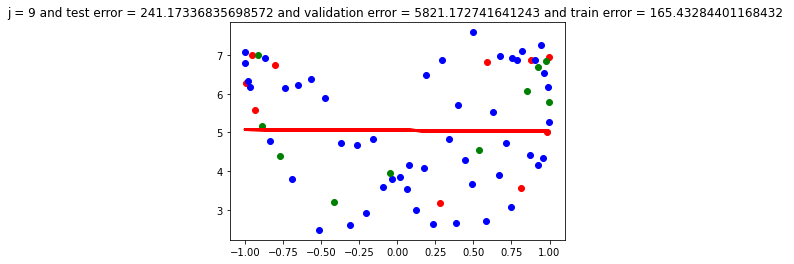

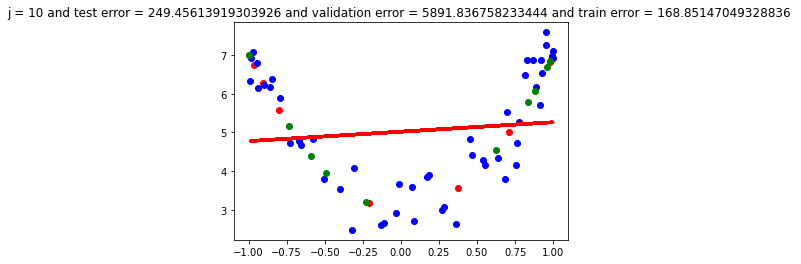

In [213]:
for j in range(1,11):
    x_test_new = np.reshape(np.cos(x_test/j) , (-1,1))
    x_train_new = np.reshape(np.cos(x_train/j) , (-1 , 1))
    x_validation_new =  np.reshape(np.cos(x_validation/j) , (-1 , 1))

    y_test_new =  np.reshape(np.cos(y_test / j) , (-1,1))
    y_train_new =  np.reshape(np.cos(y_train / j) , (-1,1))
    y_validation_new =  np.reshape(np.cos(y_validation / j) , (-1,1))

    plt.figure()
    plt.scatter(x_test_new , y_test , c='red')
    plt.scatter(x_train_new , y_train , c='blue')
    plt.scatter(x_validation_new , y_validation , c='green')

    model = LinearRegression()
    input = np.reshape(x_train_new , (-1,1))
    model.fit(input, y_train[:, np.newaxis])
    pred = model.predict(input)
    plt.plot(input, pred, color="red", linewidth=3)

    test_error = calculate_mse_error(x_test_new , y_test , model)
    validation_error = calculate_mse_error(x_train_new , y_train , model)
    train_error = calculate_mse_error(x_validation_new , y_validation , model)
    plt.title(f"j = {j} and test error = {test_error} and validation error = {validation_error} and train error = {train_error} ")